In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from sklearn import datasets, linear_model

# Linear Regression of Running Pace

## Galen Wilkerson

In [8]:
df = pd.read_csv('all_data.csv', parse_dates=True, infer_datetime_format=True, header=0)

df

,date,num_days,min,sec,Sec/60,min+sec
0,04/16/18,0,9,27,0.450000,9.450000
1,04/22/18,6,9,36,0.600000,9.600000
2,04/25/18,9,8,52,0.866667,8.866667
3,04/29/18,13,9,0,0.000000,9.000000
4,04/29/18,13,8,43,0.716667,8.716667
5,05/01/18,15,8,9,0.150000,8.150000
6,05/01/18,15,8,22,0.366667,8.366667
7,05/02/18,16,8,27,0.450000,8.450000
8,05/04/18,18,6,32,0.533333,6.533333
9,05/08/18,22,8,46,0.766667,8.766667


<IPython.core.display.Javascript object>


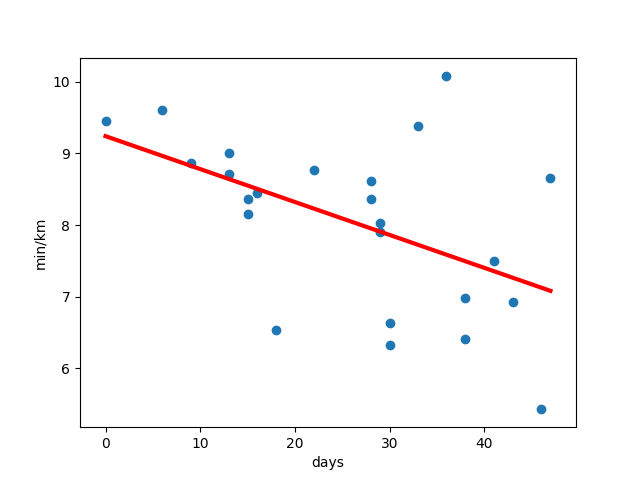

In [31]:
Y = df['min+sec']

X = df['num_days']

X_train = X.values.reshape([len(X), 1])
Y_train = Y.values.reshape([len(Y), 1])

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.figure()
plt.plot(X_train, regr.predict(X_train), color='red',linewidth=3)
#df.plot(x = 'num_days', y = 'min+sec', kind = 'scatter');
plt.scatter(df['num_days'], df['min+sec'])
plt.xlabel('days')
plt.ylabel('min/km')
plt.show();

plt.savefig('regression.png')

$$
y = mx + b
$$

$$
x = (y - b)/m
$$

### Get the slope and y intercept

In [33]:
m = regr.coef_[0][0]
m

-0.04593374493874986

In [34]:
b = regr.intercept_[0]
b

9.240974573476716

## How long to reach 5'30" pace, if I continue improving at this rate?

In [35]:
goal_pace = 5.5


In [19]:
# days from first day to reach 5.5 min/km = 5'30" min/km
x =(goal_pace - b)/m
x

81.44283855943166

In [20]:
round(x)

81.0

## Date expected to reach goal

In [22]:
date_reach_goal = pd.DatetimeIndex(df['date'][[0]]) + pd.DateOffset(days=round(x))
date_reach_goal

DatetimeIndex(['2018-07-06'], dtype='datetime64[ns]', name='date', freq=None)